In [71]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import sys

from random import randint

import tools as tl

from genSymbolImg import genSymbolImg


In [72]:
def show_image(img):
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(img, cmap='gray')
    plt.show()
    

In [73]:
def getGradient(gray, x = 0, y = 0, useGradient = True):
    if useGradient:
        
        #Finding gradinet
        grad = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=x, dy=y, ksize=3)

        '''
            take absolute value of gradient to use negative gradient
        '''
        grad = np.absolute(grad)

        '''
            Normalization of gradient
        '''
        (minVal, maxVal) = (np.min(grad), np.max(grad)) 
        if maxVal - minVal > 0:
            grad = (255 * ((grad - minVal) / float(maxVal - minVal))).astype("uint8")
        else:
            grad  = np.zeros(gray.shape, dtype = "uint8")

    else:
        grad = cv2.adaptiveThreshold(  gray,
                                        255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV,
                                        11,
                                        2)

    return grad

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


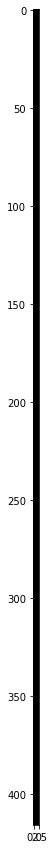

In [81]:
tmp = []
for i in range(randint(6,10)):
    
    ex_img,_ = genSymbolImg(line_size = 3, font = 5)
    tmp.append(ex_img)
    #show_image(img)
img = tl.concat_hor((tmp), color = (255,255,255))
show_image(img)

In [75]:

###
bin_img = getGradient(img,x=1,useGradient=True)
    

In [78]:
verp = np.sum(bin_img, axis=0) / 255
drawedverp = tl.getDrawProjectionHor(img, verp)

print(img[0])


TypeError: only size-1 arrays can be converted to Python scalars